## a

In [13]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import numpy.random as npr
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
!{sys.executable} -m pip install mnist

In [21]:
import mnist

['IdxDecodeError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'array',
 'datasets_url',
 'download_and_parse_mnist_file',
 'download_file',
 'functools',
 'gzip',
 'numpy',
 'operator',
 'os',
 'parse_idx',
 'struct',
 'tempfile',
 'temporary_dir',
 'test_images',
 'test_labels',
 'train_images',
 'train_labels',
 'urljoin',
 'urlretrieve']

In [22]:
from mlxtend.data import loadlocal_mnist

In [24]:
X, y = loadlocal_mnist(
        images_path='/Users/anastasia/Downloads/train-images-idx3-ubyte', 
        labels_path='/Users/anastasia/Downloads/train-labels-idx1-ubyte')

In [25]:
X.shape

(60000, 784)

## b

In [33]:
def create_clf(m, n, k, X, y): 
    tr = []
    trf = []
    for i in range(m):
        tree = DecisionTreeClassifier()
        sp = npr.choice(range(len(X)), n)
        features = npr.choice(range(len(X[0])), k) 
        tree.fit(X[sp, :][:, features], y[sp]) 
        tr = tr + [tree]
        trf = trf + [features]
    return tr, trf

In [36]:
def predictor(m, X, tr, trf): 
    sum = np.zeros((len(X), 10))
    for i in range(m):
        sum = sum + tr[i].predict_proba(X[:, trf[i]])
    return np.argmax(sum/m, axis=1)

## c

In [37]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, train_size=50000, stratify=y)
train_data.shape

(50000, 784)

In [39]:
def test_fcl(m, n, k):
    classif, feat = create_clf(m, n, k, train_data, train_labels) 
    predictions = predictor(m, test_data, classif, feat)
    accuracy = np.sum(predictions == test_labels) / 10000
    return accuracy

In [40]:
test_fcl(10, 1000, 20)

0.7202

## d

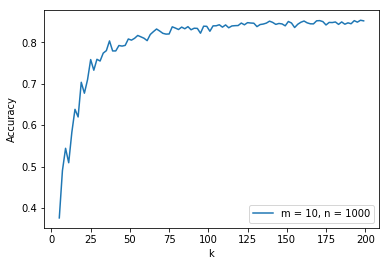

In [44]:
m = 10
n = 1000
accuracies = []
for k in range(5, 200, 2):
    accuracies = accuracies + [test_fcl(m, n, k)]
plt.plot(range(5, 200, 2), accuracies) 
plt.ylabel('Accuracy')
plt.xlabel('k')

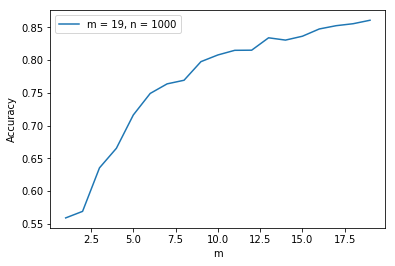

In [47]:
k = 50
n = 1000
accuracies = []
for m in range(1, 20):
    accuracies = accuracies + [test_fcl(m, n, k)]
plt.plot(range(1, 20), accuracies) 
plt.ylabel('Accuracy')
plt.xlabel('m')

Text(0.5, 0, 'n')

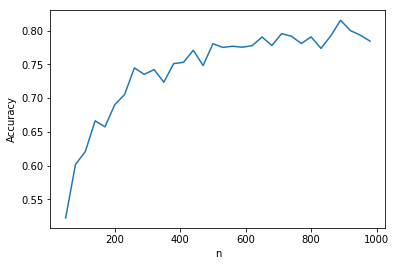

In [54]:
k = 50
m = 10
accuracies = []
for n in range(50, 1000, 30):
    accuracies = accuracies + [test_fcl(m, n, k)]
plt.plot(range(50, 1000, 30), accuracies) 
plt.ylabel('Accuracy')
plt.xlabel('n')